In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
#Univariate Analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\1521119268.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\1521119268.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\Jay\AppData\Local\Temp\ipykerne

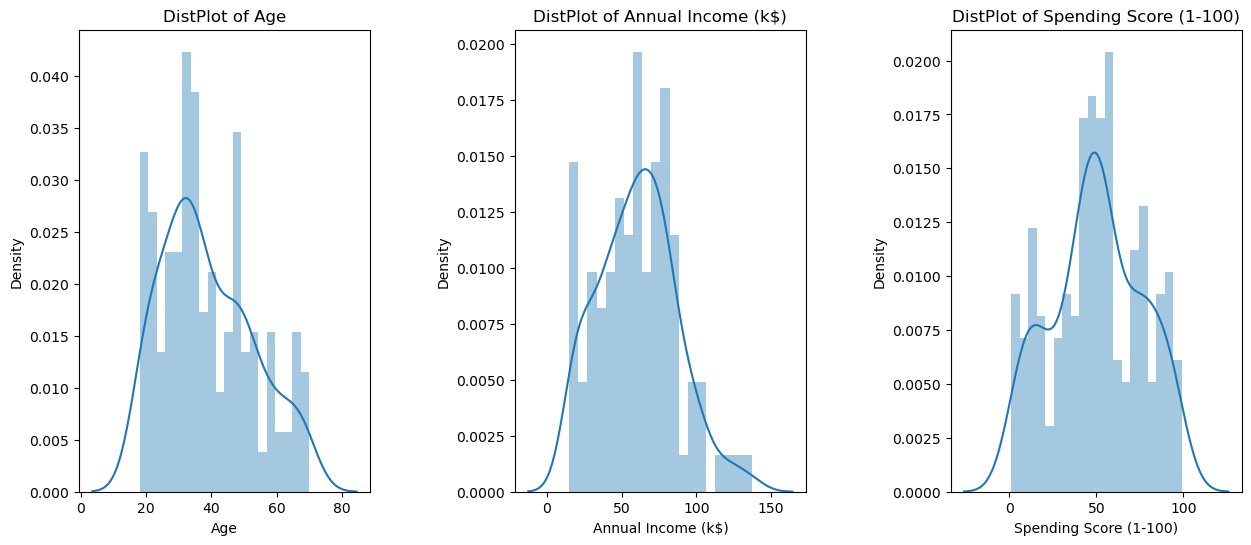

In [9]:
#dist plot for Age , Annual income and spending score
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\1754605351.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Gender' ,data=df, palette=palette)


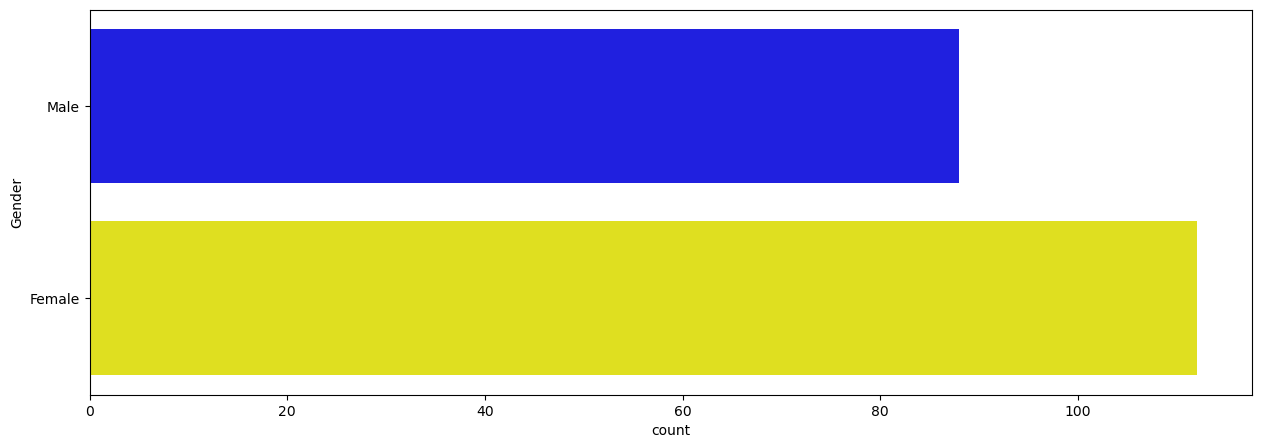

In [10]:
#comparison between male and female
palette = {'Male': 'blue', 'Female': 'Yellow'}
plt.figure(figsize=(15,5))
sns.countplot(y='Gender' ,data=df, palette=palette)
plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\3534622522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette=palette )
C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\3534622522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette=palette )
C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\3534622522.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols , y = 'Gender' , data = df , palette=palette )


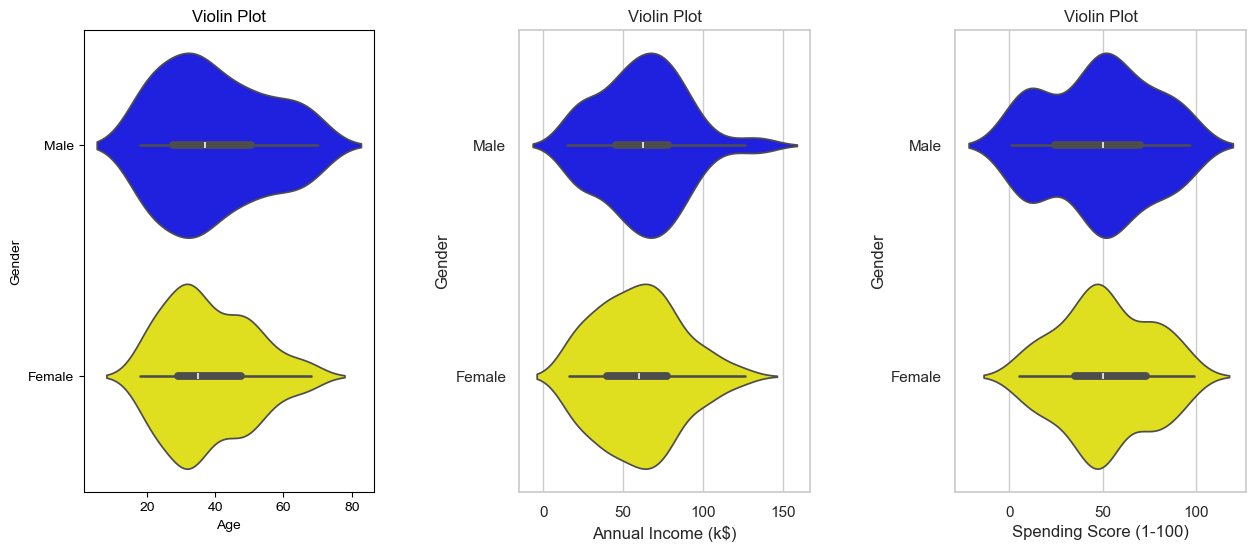

In [11]:
#How do Age, Annual Income, and Spending Score distributions vary by Gender?
#dist plot for Age , Annual income and spending score based on gender
palette = {'Male': 'blue', 'Female': 'Yellow'}
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n +=1
    plt.subplot(1 , 3 , n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette=palette )
    plt.title('Violin Plot')
plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\2806605313.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette='mako')


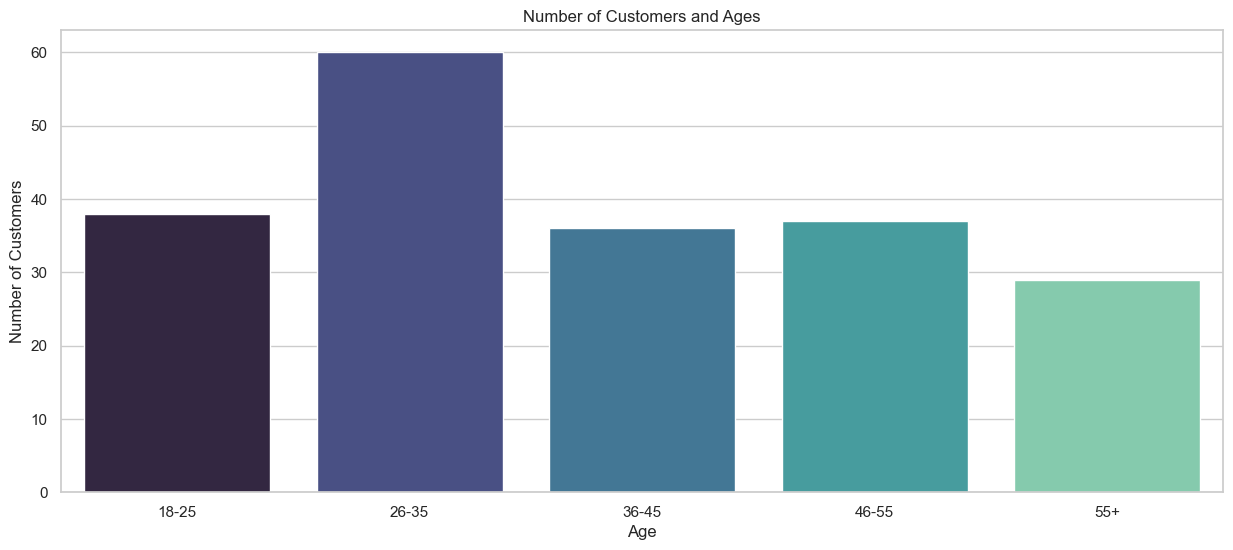

In [12]:
#What is the distribution of customers across different age groups? 
# Age range
age_18_25 = df.Age[(df.Age>= 18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age>= 26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age>= 36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age>= 46) & (df.Age<=55)]
age_above55 = df.Age[df.Age>=56]

agex = ['18-25','26-35','36-45','46-55','55+']
agey = [len(age_18_25.values), len(age_26_35.values),len(age_36_45.values), len(age_46_55.values),len(age_above55.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette='mako')
plt.title('Number of Customers and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

C:\Users\Jay\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


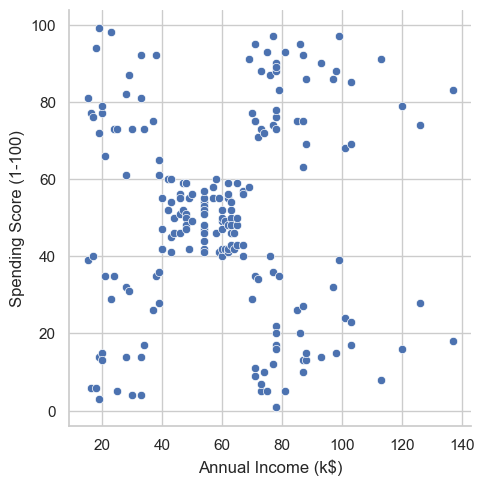

In [13]:
#Bivariate analysis
#Relationship btwn Annual Income and spending score
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\2637409060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette='rocket')


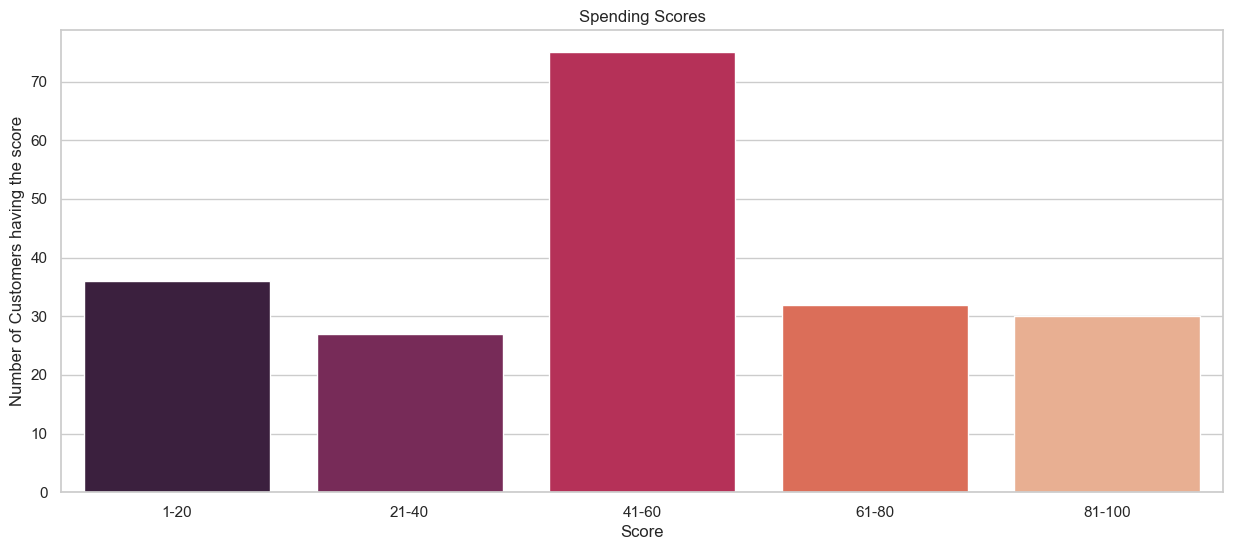

In [14]:
#How is the Spending Score distributed among customers?
#dividing spending score into different categories
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='rocket')
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the score")
plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_1224\2906630976.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette='pastel')


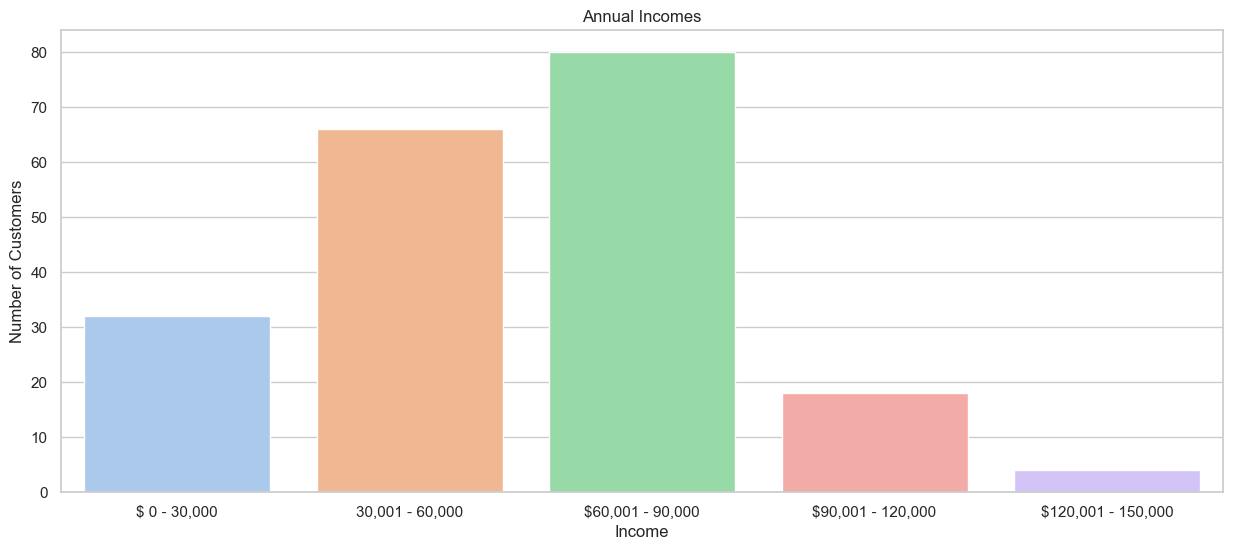

In [15]:
#How is the Annual Income distributed among customers? 
#Dividing annual income in range of 30
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <=30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <=60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <=90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <=120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <=150)]

aix = ["$ 0 - 30,000", "30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette='pastel')
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

# K-MEANS CLUSTERING

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

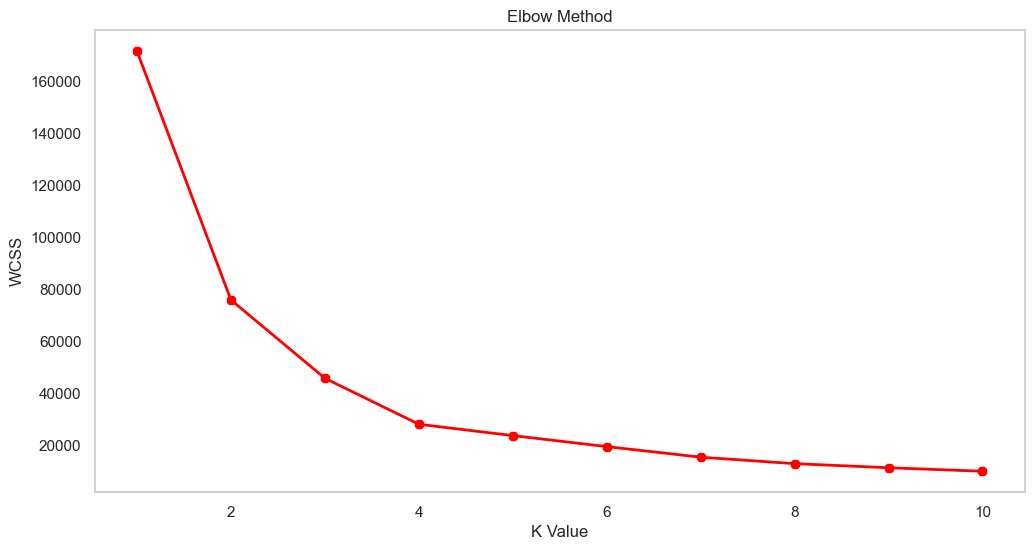

In [16]:

#optimum number of clusters# relationship between 2 var age and spending score
x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++",n_init=10, random_state=0)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
#Plot the WCSS to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker="8")
plt.title('Elbow Method')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [17]:
#clusters based on age and spending score
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x1)
print(label)

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [18]:
#centroids
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


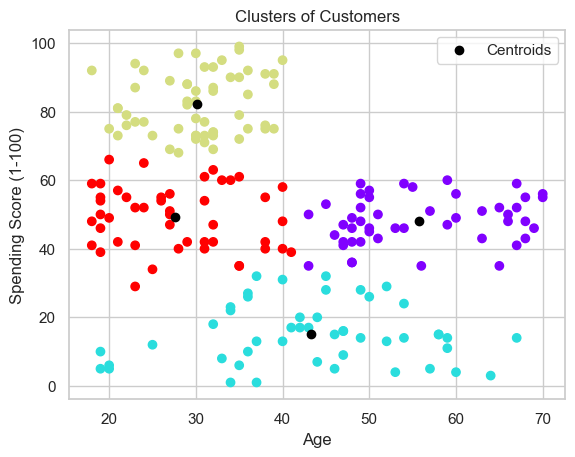

In [19]:
plt.scatter(x1[:, 0], x1[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

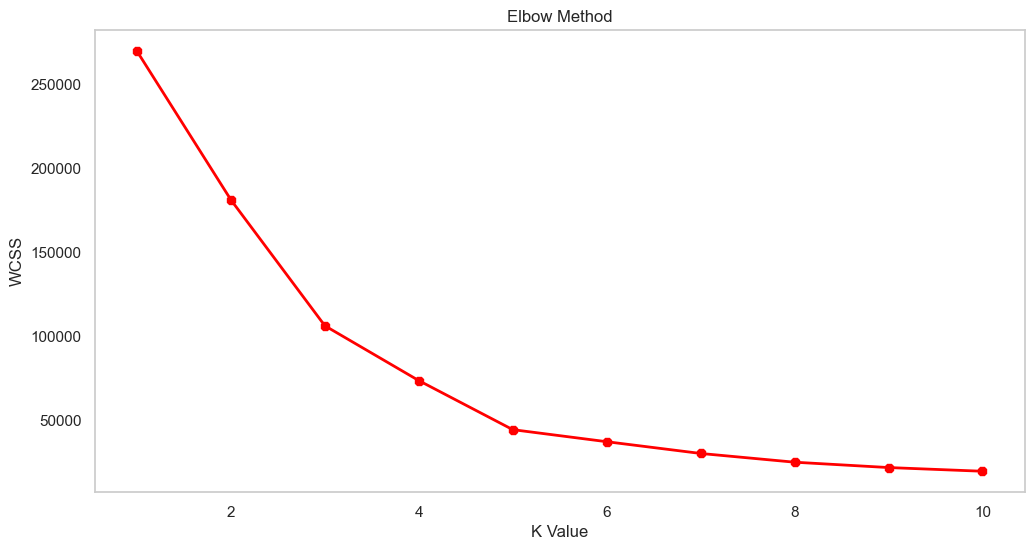

In [20]:
#clusters based on annual income and spending score
#optimum number of clusters 
x2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++",n_init=10, random_state=0)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
#Plot the WCSS to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker="8")
plt.title('Elbow Method')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [21]:
#optimum number of clusters is 5
#clusters based on annual income and spending score
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x2)
print(label)

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 1 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [22]:
#centroids
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


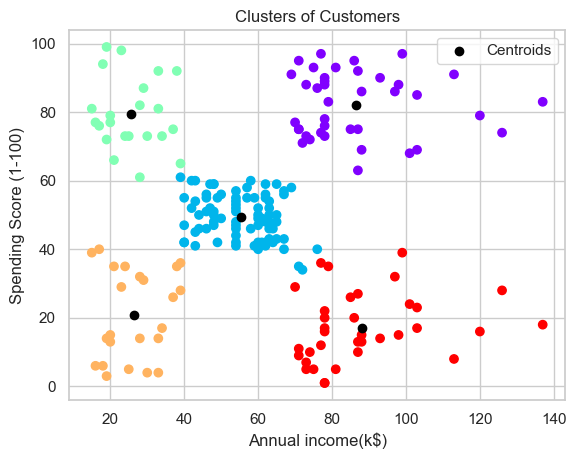

In [23]:
plt.scatter(x2[:, 0], x2[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

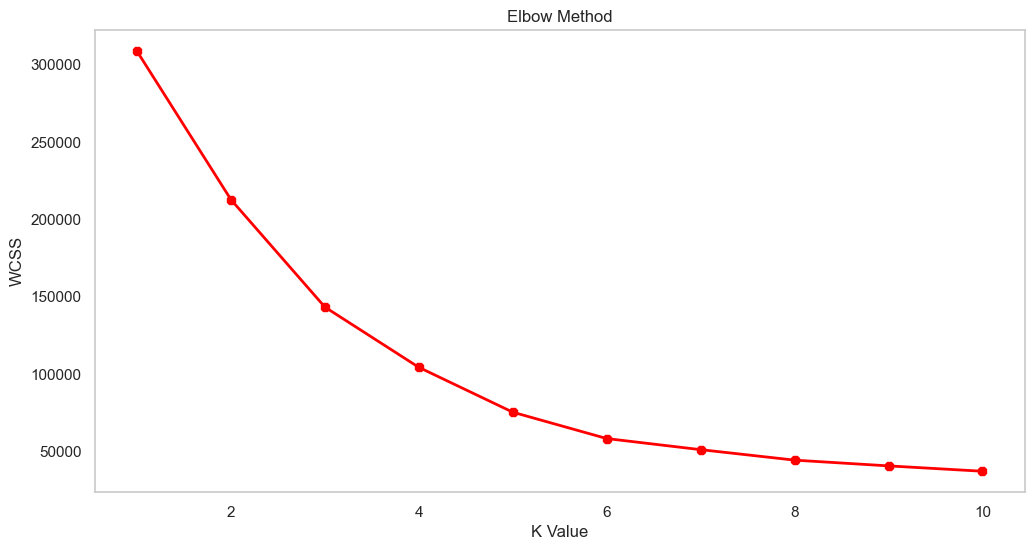

In [24]:
#age,annual income and spending score
x3=df.iloc[:,1:]
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++",n_init=10, random_state=0)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
#Plot the WCSS to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker="8")
plt.title('Elbow Method')
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(x3)
print(label)

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [26]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


In [27]:
from  mpl_toolkits.mplot3d import Axes3D

In [28]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


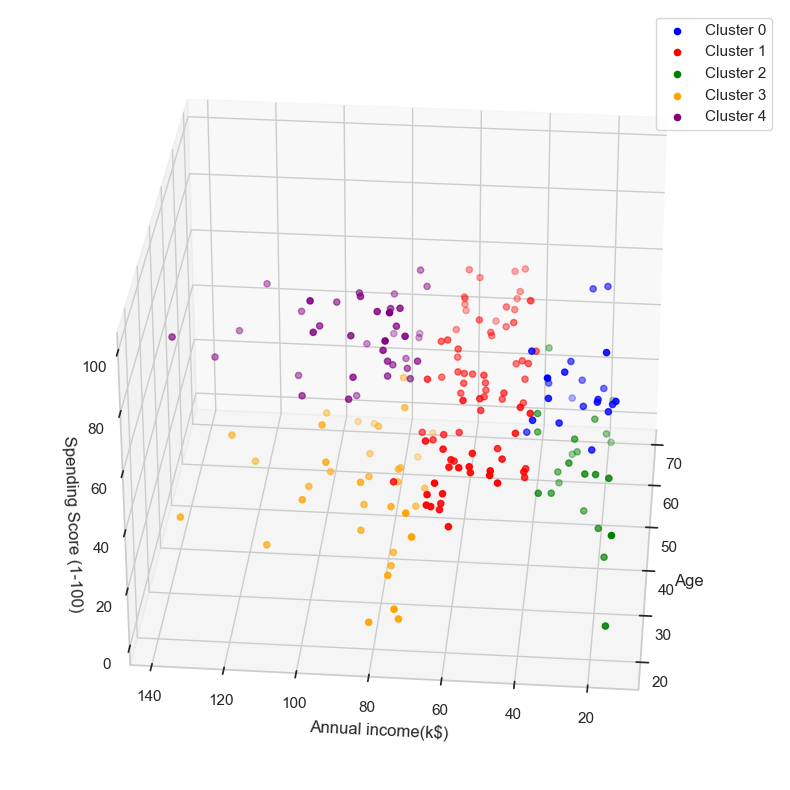

In [29]:
from mpl_toolkits.mplot3d import Axes3D  # Ensure the import is present
import matplotlib.pyplot as plt

clusters = kmeans.fit_predict(x3)
df['label'] = clusters

# Create a 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i in range(5):
    ax.scatter(df.Age[df.label == i], 
               df['Annual Income (k$)'][df.label == i], 
               df['Spending Score (1-100)'][df.label == i], 
               c=colors[i], label=f'Cluster {i}')

# Set labels and view angle
plt.xlabel("Age")
plt.ylabel("Annual income(k$)")
ax.set_zlabel('Spending Score (1-100)')
ax.view_init(30, 185)

ax.legend()

plt.show()

In [30]:
df.to_csv('cluster_results.csv', index=False)

# Identifying individual most profitable customers 

In [31]:
#original dataset with customer id but no label
original_df = pd.read_csv('Mall_customers.csv')

#clustered data (without CustomerID)
clustered_df = pd.read_csv('cluster_results.csv')

# Add cluster labels to the original DataFrame
original_df['label'] = clustered_df['label']

# Filter for the most profitable cluster (Cluster 0)
cluster_0_customers = original_df[original_df['label'] == 0]

# Extract relevant customer details
customer_details_cluster_0 = cluster_0_customers[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(customer_details_cluster_0)


    CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
1            2   21                  15                      81
3            4   23                  16                      77
5            6   22                  17                      76
7            8   23                  18                      94
9           10   30                  19                      72
11          12   35                  19                      99
13          14   24                  20                      77
15          16   22                  20                      79
17          18   20                  21                      66
19          20   35                  23                      98
21          22   25                  24                      73
23          24   31                  25                      73
25          26   29                  28                      82
27          28   35                  28                      61
29          30   23                  29 